In [3]:

import ROOT
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from ROOT import TCanvas, TPaveText
from ROOT import gROOT
#ROOT.gROOT.SetBatch(False)

# Poisson Distribution: Mean and Sigma

The Poisson distribution with parameter $\lambda$ has probability:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$
$$
\lambda = p * N 
$$
**Mean:**

$$
\mu = \lambda
$$

**Standard Deviation:**

$$
\sigma = \sqrt{\lambda}
$$

These relations make the Poisson distribution very convenient for modeling count data.


In [5]:
rng = ROOT.TRandom3(0)   # seed = 0 for random seed

In [6]:
lam = 5
data = [rng.Poisson(lam) for _ in range(10000)]


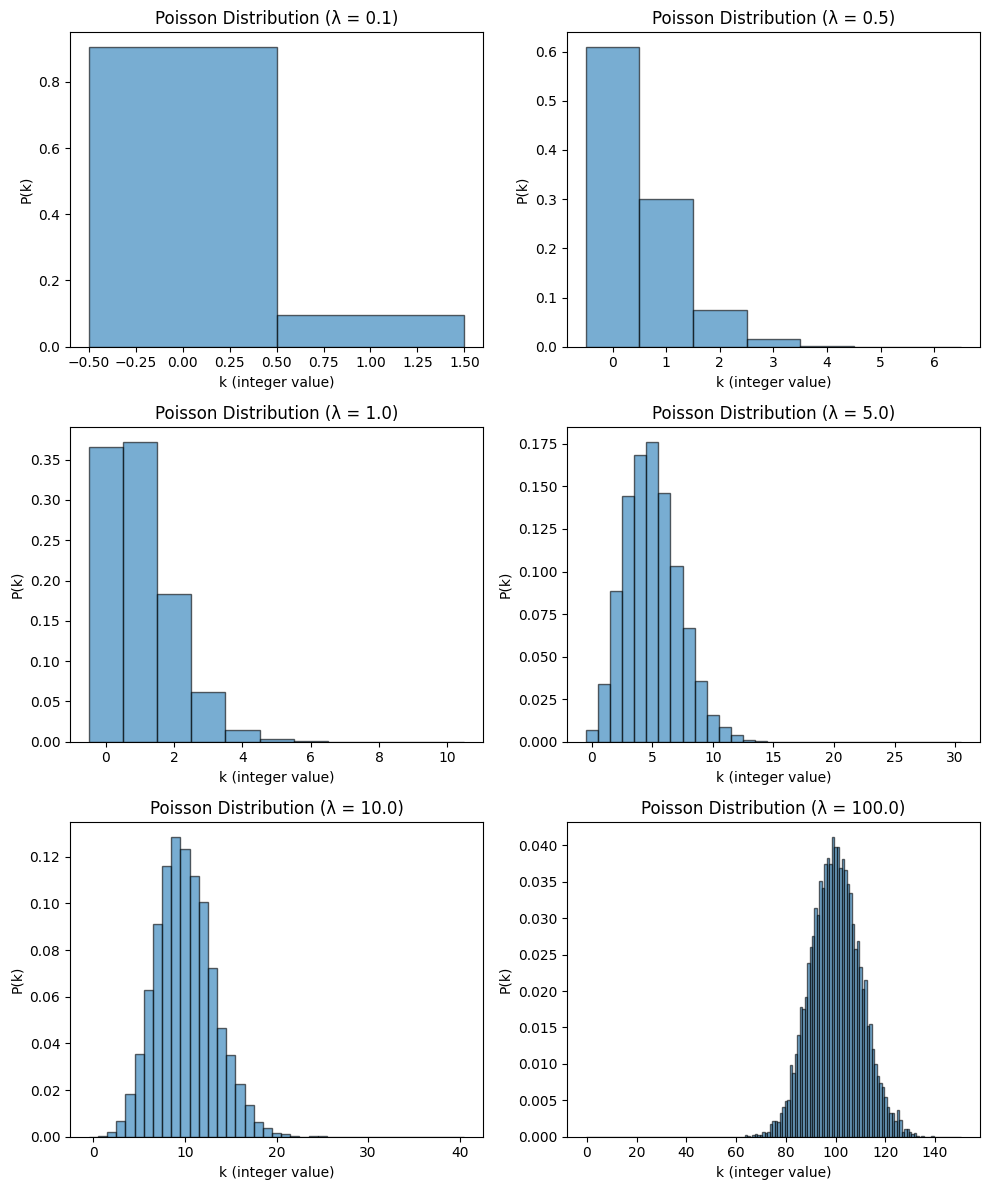

In [8]:
lams = [0.1, 0.5, 1.0, 5.0, 10.0, 100.0]
range_b = [1, 6, 10, 30, 40, 150]

fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()

for i, lam in enumerate(lams):
    data = [rng.Poisson(lam) for _ in range(10000)]
    bins = np.arange(0, range_b[i] + 2) - 0.5
    axes[i].hist(data, bins=bins, density=True, alpha=0.6, edgecolor="black")

    axes[i].set_xlabel("k (integer value)")
    axes[i].set_ylabel("P(k)")
    axes[i].set_title(f"Poisson Distribution (λ = {lam})")

    # ticks at integer values only
    #axes[i].set_xticks(np.arange(0, range_b[i] + 1))

plt.tight_layout()
plt.show()

# Fit using RootFit

In [24]:
h = ROOT.TH1F("k_0.1M1", "Poisson Data", 79, 60, 140)
lam = 100
for _ in range(1000000):
    value = rng.Poisson(lam)
    h.Fill(value)

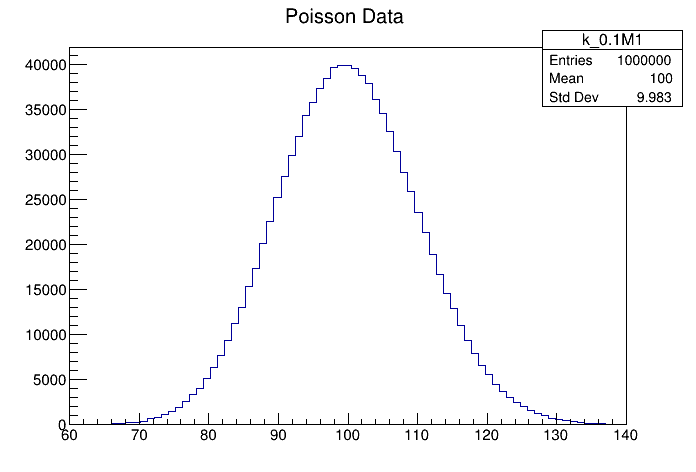

In [26]:

c = TCanvas()
h.Draw()
c.Draw()

In [27]:
x = ROOT.RooRealVar("x", "x", 60, 140)
lambda_fit = ROOT.RooRealVar("lambda", "lambda", 100, 90, 110)

pdf = ROOT.RooGenericPdf(
    "pdf",
    "pow(lambda, x) * exp(-lambda) / TMath::Factorial(x)",
    ROOT.RooArgList(x, lambda_fit)
)

data = ROOT.RooDataHist("data", "data", ROOT.RooArgList(x), h)

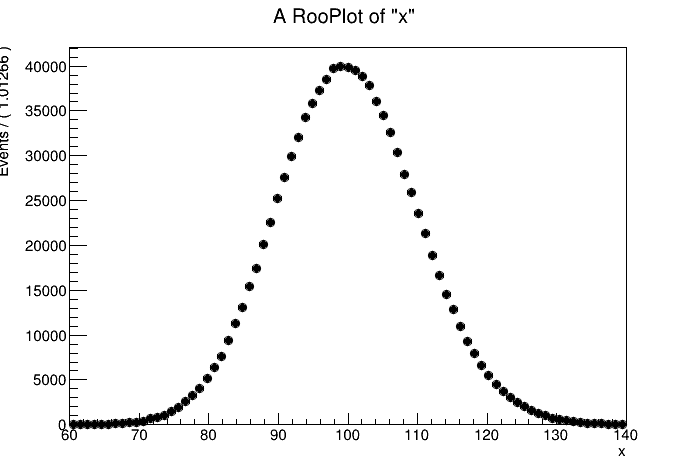

In [35]:
frame = x.frame()
data.plotOn(frame)
c = TCanvas()
frame.Draw()
c.Draw()

In [29]:
pdf.fitTo(data)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#0] WARNING:Integration -- RooIntegrator1D::integral: integral of pdf over range (60,140) did not converge after 20 steps
   [1] h = 1 , s = 0.00128418
   [2] h = 0.25 , s = 1.59508
   [3] h = 0.0625 , s = 1.01272
   [4] h = 0.015625 , s = 0.999833
   [5] h = 0.00390625 , s = 0.999891
   [6] h = 0.000976562 , s = 5.49951
   [7] h = 0.000244141 , s = 11.4454
   [8] h = 6.10352e-05 , s = 15.8988
   [9] h = 1.52588e-05 , s = 18.5499
   [10] h = 3.8147e-06 , s = 19.9858
   [11] h = 9.53674e-07 , s = 20.7314
   [12] h = 2.38419e-07 , s = 21.1111
   [13] h = 5.96046e-08 , s = 21.3027
   [14] h = 1.49012e-08 , s = 21.3989
   [15] h = 3.72529e-09 , s = 21.4472
   [16] h = 9.31323e-10 , s = 21.4713
   [17] h = 2.32831e-10 , s = 21.4834
   [18] h = 5.82077e-11 , s = 21.4894
   [19] h = 1.45519e-11 , s = 21.4924
   [20] h = 3.63798e-12 , s = 21.494
[#1] INFO:Minimization

[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#0] WARNING:Integration -- RooIntegrator1D::integral: integral of pdf over range (60,140) did not converge after 20 steps
   [1] h = 1 , s = 0.00104972
   [2] h = 0.25 , s = 1.59011
   [3] h = 0.0625 , s = 1.01107
   [4] h = 0.015625 , s = 0.999864
   [5] h = 0.00390625 , s = 0.999914
   [6] h = 0.000976562 , s = 5.48012
   [7] h = 0.000244141 , s = 11.3881
   [8] h = 6.10352e-05 , s = 15.8094
   [9] h = 1.52588e-05 , s = 18.4405
   [10] h = 3.8147e-06 , s = 19.8652
   [11] h = 9.53674e-07 , s = 20.605
   [12] h = 2.38419e-07 , s = 20.9817
   [13] h = 5.96046e-08 , s = 21.1718
   [14] h = 1.49012e-08 , s = 21.2673
   [15] h = 3.72529e-09 , s = 21.3152
   [16] h = 9.31323e-10 , s = 21.3391
   [17] h = 2.32831e-10 , s = 21.3511
   [18] h = 5.82077e-11 , s = 21.3571
   [19] h = 1.45519e-11 , s = 21.3601
   [20] h = 3.63798e-12 , s = 21.3616


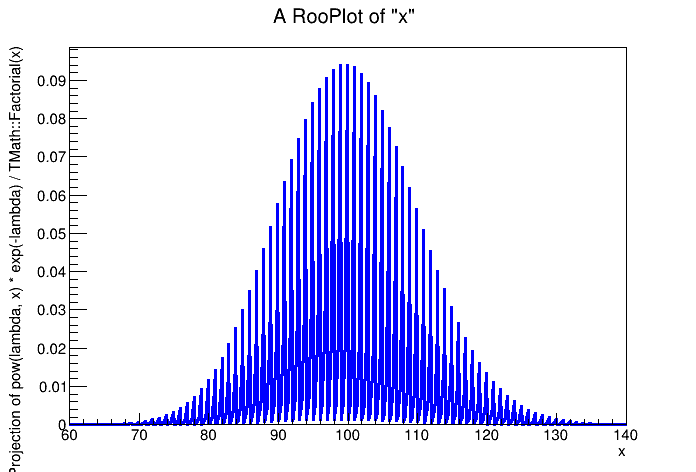

In [30]:
frame = x.frame()
pdf.plotOn(frame)
c = TCanvas()
frame.Draw()
c.Draw()

In [31]:

print("Fitted lambda =", lambda_fit.getVal())
print("Fit error =", lambda_fit.getError())

Fitted lambda = 99.22092162912399
Fit error = 0.009966022188457657


In [33]:
generate_data_pdf = pdf.generate(ROOT.RooArgSet(x), 1_000_000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#0] WARNING:Integration -- RooIntegrator1D::integral: integral of pdf over range (60,140) did not converge after 20 steps
   [1] h = 1 , s = 0.00104972
   [2] h = 0.25 , s = 1.59011
   [3] h = 0.0625 , s = 1.01107
   [4] h = 0.015625 , s = 0.999864
   [5] h = 0.00390625 , s = 0.999914
   [6] h = 0.000976562 , s = 5.48012
   [7] h = 0.000244141 , s = 11.3881
   [8] h = 6.10352e-05 , s = 15.8094
   [9] h = 1.52588e-05 , s = 18.4405
   [10] h = 3.8147e-06 , s = 19.8652
   [11] h = 9.53674e-07 , s = 20.605
   [12] h = 2.38419e-07 , s = 20.9817
   [13] h = 5.96046e-08 , s = 21.1718
   [14] h = 1.49012e-08 , s = 21.2673
   [15] h = 3.72529e-09 , s = 21.3152
   [16] h = 9.31323e-10 , s = 21.3391
   [17] h = 2.32831e-10 , s = 21.3511
   [18] h = 5.82077e-11 , s = 21.3571
   [19] h = 1.45519e-11 , s = 21.3601
   [20] h = 3.63798e-12 , s = 21.3616
[#1] INFO:NumericInteg

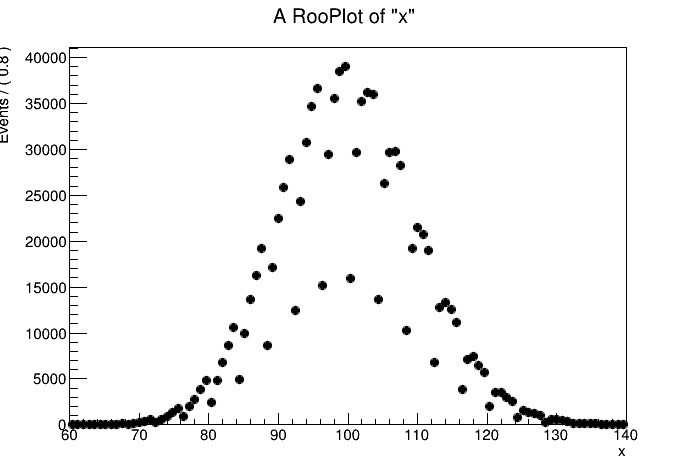

In [34]:
frame = x.frame()
generate_data_pdf.plotOn(frame)
can = TCanvas()
frame.Draw()
can.Draw()

# Fit using bultin function

In [36]:
pdf = ROOT.RooPoisson("pdf", "Poisson PDF", x, lambda_fit)


In [37]:
pdf.fitTo(data)

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   22 **SET PRINT           1
 **********
 **********
 **   23 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 lambda       9.92209e+01  9.96602e-03    9.00000e+01  1.10000e+02
 **********
 **   24 **SET ERR         0.5
 **********
 **********
 **   25 **SET PRINT           1
 **********
 **********
 **   26 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   27 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=3.76056e+06 FROM MIGRAD    STATUS=INITIATE        2 CALLS           3 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       S

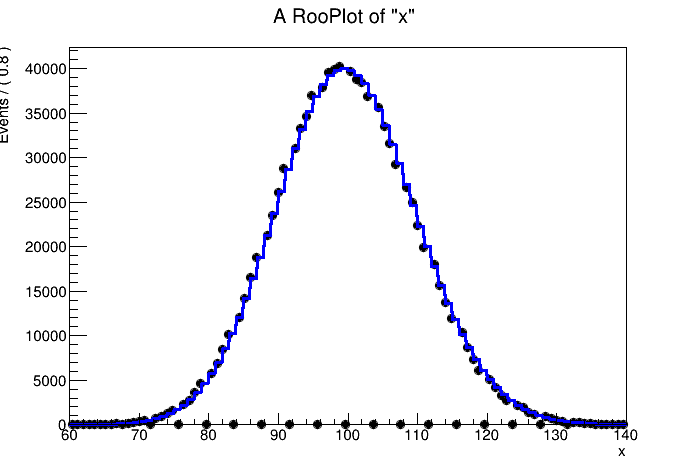

In [43]:
generate_data_pdf_ = pdf.generate(ROOT.RooArgSet(x), 1_000_000)
frame = x.frame()
generate_data_pdf_.plotOn(frame)
pdf.plotOn(frame, ROOT.RooFit.Normalization(1_000_000, ROOT.RooAbsReal.Raw))
c = TCanvas()
frame.Draw()
c.Draw()

# Fit to gaussin function 

In [45]:
mean  = ROOT.RooRealVar("mean",  "mean of gauss", 97, 90, 110)
sigma = ROOT.RooRealVar("sigma", "width of gauss", 9, 0.1, 30)
gauss = ROOT.RooGaussian("gauss", "Gaussian PDF", x, mean, sigma)

In [46]:
gauss.fitTo(data)

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         9.70000e+01  2.00000e+00    9.00000e+01  1.10000e+02
     2 sigma        9.00000e+00  2.99000e+00    1.00000e-01  3.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=3.80269e+06 FROM MIGRAD    STATUS=INITIATE       10 CALLS          11 TOTAL
                     EDM= unknown      STRATEGY= 1      N

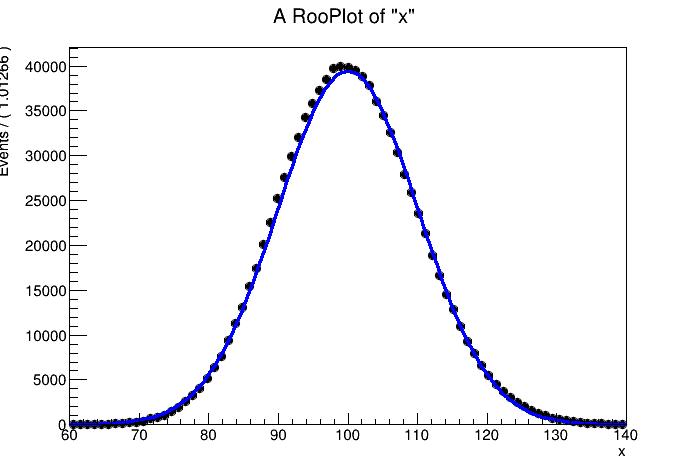

In [47]:
# generate_data_pdf_gauss = pdf.generate(ROOT.RooArgSet(x), 1_000_000)
frame = x.frame()
data.plotOn(frame)
gauss.plotOn(frame, ROOT.RooFit.Normalization(1_000_000, ROOT.RooAbsReal.Raw))
c = TCanvas()
frame.Draw()
c.Draw()

In [48]:
print(f"The mean value is {mean.getVal()}")
print(f"The sigma value is {sigma.getVal()}")

The mean value is 100.01110412261266
The sigma value is 10.116097633340228
